# Predicting House Sale Prices Using Linear Regression
In this project, we'll predict the sale prices of houses in Ames, Iowa using its attributes. Our goal is to build this predictive model using Linear Regression. More details about the dataset [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

### Summary of Results
Our Linear Regression model has an average R2 score of 0.877 and an average RMSE of 27409.5. 

## Introduction to the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [2]:
houses = pd.read_csv("AmesHousing.tsv", delimiter="\t")
houses

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


Let's lay out the foundation of our functions for now and modify them later.

In [3]:
def transform_features(houses):
    return houses

In [4]:
def select_features(houses):
    return houses[["Gr Liv Area", "SalePrice"]]

In [5]:
def train_and_test(houses):
    train = houses[:1460]
    test = houses[1460:]
    
    numerical_train = train.select_dtypes(include=['float', 'int'])
    numerical_test = test.select_dtypes(include=['float', 'int'])
    
    features = numerical_train.columns.drop("SalePrice")
    
    model = LinearRegression()
    model.fit(train[features], train["SalePrice"])
    predictions = model.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test["SalePrice"], predictions))
    return rmse

## Data Cleaning and Feature Engineering

* Handle missing values:
    * All columns:
        * Drop any with 5% or more missing values.
    * Text columns:
        * Drop any with 1 or more missing values.
    * Numerical columns:
        * For columns with missing values, fill in with the most common value in that column.
* What new features can we create that better capture the information in some of the features?
* Which columns need to be dropped for other reasons?
    * Which columns aren't useful for machine learning?
    * Which columns leak data about the final sale?

### Handle missing values

All columns: Drop any with 5% or more missing values.

In [6]:
#Number of missing values for each column in houses
n_missing = houses.isnull().sum()
n_missing.sort_values(ascending=False)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Fireplace Qu    1422
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

In [7]:
#Filter n_missing to columns with >=5% missing values
missing_cols = n_missing[n_missing >= (0.05*len(houses))]

#Drop missing_cols from houses
houses = houses.drop(missing_cols.index, axis=1)

missing_cols

Lot Frontage      490
Alley            2732
Fireplace Qu     1422
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Pool QC          2917
Fence            2358
Misc Feature     2824
dtype: int64

Text columns: Drop any with 1 or more missing values.

In [8]:
#Number of missing values for each text column in houses
text_cols = houses.select_dtypes(include=['object']).columns
n_missing_text = houses[text_cols].isnull().sum().sort_values(ascending=False)
n_missing_text

Bsmt Exposure     83
BsmtFin Type 2    81
Bsmt Qual         80
Bsmt Cond         80
BsmtFin Type 1    80
Mas Vnr Type      23
Electrical         1
Heating            0
Foundation         0
MS Zoning          0
Exter Cond         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
Sale Type          0
Heating QC         0
Exter Qual         0
Street             0
Exterior 2nd       0
Exterior 1st       0
Roof Matl          0
Roof Style         0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
Lot Config         0
Utilities          0
Land Contour       0
Lot Shape          0
Sale Condition     0
dtype: int64

In [9]:
#Drop any text column with missing values
houses = houses.drop(n_missing_text[n_missing_text > 0].index, axis=1)

Numerical columns: For columns with missing values, fill in with the most common value in that column.

In [10]:
#Number of missing values for each numerical column in houses
numerical_cols = houses.select_dtypes(include=["int","float"]).columns
n_missing_numerical = houses[numerical_cols].isnull().sum().sort_values(ascending=False)
n_missing_numerical

Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
Garage Area         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 1        1
BsmtFin SF 2        1
3Ssn Porch          0
Kitchen AbvGr       0
Screen Porch        0
Pool Area           0
Enclosed Porch      0
Open Porch SF       0
Wood Deck SF        0
Misc Val            0
Mo Sold             0
Yr Sold             0
Fireplaces          0
TotRms AbvGrd       0
Order               0
Bedroom AbvGr       0
Half Bath           0
Full Bath           0
PID                 0
Gr Liv Area         0
Low Qual Fin SF     0
2nd Flr SF          0
1st Flr SF          0
Year Remod/Add      0
Year Built          0
Overall Cond        0
Overall Qual        0
Lot Area            0
MS SubClass         0
SalePrice           0
dtype: int64

In [11]:
#Filter non-zero missing values
n_missing_numerical = n_missing_numerical[n_missing_numerical > 0]

#Replace NA values in each column with the mode of that column
col_mode = houses[n_missing_numerical.index].mode().to_dict(orient='records')[0]
houses[n_missing_numerical.index] = houses[n_missing_numerical.index].fillna(col_mode)

In [12]:
houses.isnull().sum().sort_values(ascending=False).value_counts()

0    64
dtype: int64

### Create new features
What new features can we create that better capture the information in some of the features?

In [13]:
houses[["Year Remod/Add", "Year Built"]].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


The two main issues with these features are:
* Year values aren't representative of how old a house is
* The `Year Remod/Add` column doesn't actually provide useful information for our Linear Regression model

Year values don't do a good job of capturing how old a house is. Instead of the years certain events happened, we want the difference between those years. We'll now create two new columns that are more representative of how old a house is.

In [14]:
houses["Years Before Sale"] = houses["Yr Sold"] - houses["Year Built"]
houses["Years Since Remod"] = houses["Yr Sold"] - houses["Year Remod/Add"]

In [15]:
houses[["Years Before Sale", "Years Since Remod"]].head()

,Years Before Sale,Years Since Remod
0,50,50
1,49,49
2,52,52
3,42,42
4,13,12


In [16]:
houses["Years Before Sale"][houses["Years Before Sale"] < 0]

2180   -1
Name: Years Before Sale, dtype: int64

In [17]:
houses["Years Since Remod"][houses["Years Since Remod"] < 0]

1702   -1
2180   -2
2181   -1
Name: Years Since Remod, dtype: int64

In [18]:
#A negative number of years doesn't make sense, so we'll drop these rows
houses = houses.drop([1702,2180,2181], axis=0)

#We have no use for these original year columns anymore
houses = houses.drop(["Year Remod/Add", "Year Built"], axis=1)

### Drop columns
* that are not useful for machine learning
* that leak data about the final sale

In [19]:
#Not useful for ML
houses = houses.drop(["PID", "Order"], axis=1)

#Leak data about the final sale
houses = houses.drop(["Sale Condition", "Sale Type", "Yr Sold", "Mo Sold"], axis=1)

Let's now update `transform_features()` to reflect all these changes for a cleaner look.

In [20]:
def transform_features(houses):
    #Drop any col with 5% or more missing values
    n_missing = houses.isnull().sum()
    missing_cols = n_missing[n_missing >= (0.05*len(houses))]
    houses = houses.drop(missing_cols.index, axis=1)
    
    #Drop any text col with 1 or more missing value(s)
    text_cols = houses.select_dtypes(include=['object']).columns
    n_missing_text = houses[text_cols].isnull().sum().sort_values(ascending=False)
    houses = houses.drop(n_missing_text[n_missing_text > 0].index, axis=1)
    
    #For numerical cols with missing values, replace missing value with mode of column
    numerical_cols = houses.select_dtypes(include=["int","float"]).columns
    n_missing_numerical = houses[numerical_cols].isnull().sum().sort_values(ascending=False)
    n_missing_numerical = n_missing_numerical[n_missing_numerical > 0]
    col_mode = houses[n_missing_numerical.index].mode().to_dict(orient='records')[0]
    houses[n_missing_numerical.index] = houses[n_missing_numerical.index].fillna(col_mode)
    
    #Create new features that better capture information
    houses["Years Before Sale"] = houses["Yr Sold"] - houses["Year Built"]
    houses["Years Since Remod"] = houses["Yr Sold"] - houses["Year Remod/Add"]
    houses = houses.drop([1702,2180,2181], axis=0)
    houses = houses.drop(["Year Remod/Add", "Year Built"], axis=1)
    
    #Drop columns that are not useful for ML or that leak data about the final sale
    houses = houses.drop(["PID", "Order"], axis=1)
    houses = houses.drop(["Sale Condition", "Sale Type", "Yr Sold", "Mo Sold"], axis=1)
    
    return houses

## Feature Selection

<AxesSubplot:>

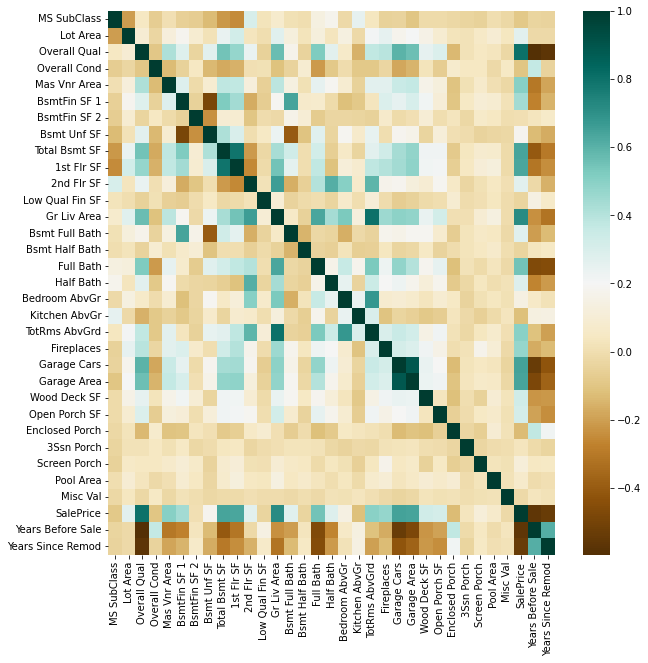

In [21]:
import seaborn as sns
%matplotlib inline

numeric_houses = houses.select_dtypes(include=['float', 'int'])
plt.subplots(figsize=(10,10))
sns.heatmap(numeric_houses.corr(), cmap='BrBG')

In [22]:
abs_corr_coeffs = np.abs(numeric_houses.corr()["SalePrice"]).sort_values(ascending=False)
abs_corr_coeffs

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Misc Val             0.019273
BsmtFin SF 2         0.006127
Name: Sale

In [23]:
#Drop columns with < 0.4 correlation with SalePrice (arbitrary number)
houses = houses.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

Which columns with nominal values should we convert to categorical?

In [24]:
#Nominal columns according to the documentation
nominal_cols = ["PID", "MS Subclass", "MS Zoning", "Street", "Alley", 
                "Land Contour", "Lot Config", "Neighborhood", 
                "Condition 1", "Condition 2", "Bldg Type", "House Style", 
                "Roof Style", "Roof Matl", "Exterior 1st", 
                "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                "Central Air", "Garage Type", 
                "Misc Feature", "Sale Type", "Sale Condition"]

In [25]:
#See which nominal columns are still in our dataframe
convert_to_cat = [col for col in nominal_cols if col in houses.columns]
convert_to_cat

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [26]:
#Number of unique values in each nominal column (to be converted to categorical) in our dataframe 
count_unique = houses[convert_to_cat].apply(
                        lambda cat_col: len(cat_col.unique())
                                            ).sort_values()
count_unique

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

All of the nominal columns are candidates for being converted to categorical; however, we need a cutoff number for the number of unique values. When we dummy code a column, the number of unique values it has will be the number of columns that will be added back to the dataframe. Additionally, a column with few unique values but more than 95% of the values in the column belonging to a specific category will have low variance. Thus, that column would not be helpful for the model.

In [27]:
#We'll choose 10 as the cutoff number (arbitrary number)
#Drop nominal columns with more than 10 unique values
houses = houses.drop(count_unique[count_unique>10].index, axis=1)

In [28]:
#Drop nominal columns with low variance

#Update nominal columns to be converted to categorical
convert_to_cat = count_unique[count_unique < 10].index.tolist()
drop_cols = []
for col in convert_to_cat:
    count_val = houses[col].value_counts()
    
    #If 95% of values in a column belong to one category,
    #keep track for dropping
    if count_val[0]/len(houses[col]) >= 0.95:
        drop_cols.append(col)
        
houses = houses.drop(drop_cols, axis=1)

In [29]:
#We will now convert the text columns to categorical
text_cols = houses.select_dtypes(include=["object"])
houses[text_cols.columns] = text_cols.apply(
                                lambda col: col.astype("category")
                                            )
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MS Zoning          2927 non-null   category
 1   Lot Shape          2927 non-null   category
 2   Land Contour       2927 non-null   category
 3   Utilities          2927 non-null   category
 4   Lot Config         2927 non-null   category
 5   Land Slope         2927 non-null   category
 6   Condition 1        2927 non-null   category
 7   Bldg Type          2927 non-null   category
 8   House Style        2927 non-null   category
 9   Overall Qual       2927 non-null   int64   
 10  Roof Style         2927 non-null   category
 11  Mas Vnr Area       2927 non-null   float64 
 12  Exter Qual         2927 non-null   category
 13  Exter Cond         2927 non-null   category
 14  Foundation         2927 non-null   category
 15  BsmtFin SF 1       2927 non-null   float64 
 16  Total 

In [30]:
#Create dummy columns
dummy = pd.get_dummies(houses.select_dtypes(include=["category"]))

#Add dummy columns to dataframe
houses = pd.concat(
                [houses,
                 dummy],
                axis=1)

#Drop original categorical columns
houses = houses.drop(text_cols.columns, axis=1)

Now that we've dealt with nominal columns, which columns are currently numerical but need to be encoded as categorical instead, since the numbers don't have any semantic meaning?
   * Based on the documentation, `Overall Qual` and `Overall Cond`.
   * We've already dropped `Overall Cond` earlier when we were dropping columns with < 0.4 absolute correlation coefficients with `SalePrice`.

In [31]:
houses["Overall Qual"].value_counts()

5     825
6     732
7     602
8     349
4     226
9     107
3      40
10     29
2      13
1       4
Name: Overall Qual, dtype: int64

In [32]:
#Add dummy columns to dataframe and drop original column `Overall Qual`
dummy_num = pd.get_dummies(houses["Overall Qual"].astype("category"))
houses = (pd.concat(
                [houses,
                 dummy_num],
                axis=1)
            .drop("Overall Qual", axis=1))

In [33]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Columns: 115 entries, Mas Vnr Area to 10
dtypes: float64(5), int64(8), uint8(102)
memory usage: 611.7 KB


Let's now update `select_features()` to reflect all these changes in a more concise look.

In [34]:
def select_features(houses, coeff_threshold=0.4, unique_threshold=10):
    #Drop numeric columns with < coeff_threshold correlation with SalePrice
    numeric_houses = houses.select_dtypes(include=['float', 'int'])
    abs_corr_coeffs = np.abs(numeric_houses.corr()["SalePrice"]).sort_values(ascending=False)
    houses = houses.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    #Drop text columns with > unique_threshold number of unique values
    nominal_cols = ["PID", "MS Subclass", "MS Zoning", "Street", "Alley", 
                "Land Contour", "Lot Config", "Neighborhood", 
                "Condition 1", "Condition 2", "Bldg Type", "House Style", 
                "Roof Style", "Roof Matl", "Exterior 1st", 
                "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                "Central Air", "Garage Type", 
                "Misc Feature", "Sale Type", "Sale Condition"]
    convert_to_cat = [col for col in nominal_cols if col in houses.columns]
    count_unique = houses[convert_to_cat].apply(
                            lambda cat_col: len(cat_col.unique())
                                                ).sort_values()
    houses = houses.drop(count_unique[count_unique > unique_threshold].index, axis=1)
    
    #Drop text columns with low variance
    convert_to_cat = count_unique[count_unique < unique_threshold].index.tolist()
    drop_cols = []
    for col in convert_to_cat:
        count_val = houses[col].value_counts()
        if count_val[0]/len(houses[col]) >= 0.95:
            drop_cols.append(col)
    houses = houses.drop(drop_cols, axis=1)
    
    #We will now convert the text columns to categorical
    text_cols = houses.select_dtypes(include=["object"])
    houses[text_cols.columns] = text_cols.apply(
                                    lambda col: col.astype("category")
                                                )
    
    #Dummy code
    dummy = pd.get_dummies(houses.select_dtypes(include=["category"]))
    houses = pd.concat(
                    [houses,
                     dummy],
                    axis=1)
    houses = houses.drop(text_cols.columns, axis=1)
    
    #Numerical ordinal -> categorical
    if abs_corr_coeffs["Overall Qual"] > coeff_threshold:
        dummy_num = pd.get_dummies(houses["Overall Qual"].astype("category"))
        houses = (pd.concat(
                        [houses,
                         dummy_num],
                        axis=1)
                    .drop("Overall Qual", axis=1))
    
    return houses

## Train and Test

In [35]:
def train_and_test(houses, k=0):
    features = houses.columns.drop("SalePrice")
    target = "SalePrice"
    
    #Holdout validation
    if k==0:
        train = houses[:1460]
        test = houses[1460:]
        
        model = LinearRegression()
        model.fit(train[features], train[target])
        predictions = model.predict(test[features])
        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        r2 = r2_score(test[target], predictions)
        
        return rmse, r2
    
    elif k==1:
        #randomize all rows
        houses = houses.sample(frac=1, random_state=1, axis=0)
        fold_one = houses[:1460]
        fold_two = houses[1460:]
        
        model = LinearRegression()
        
        model.fit(fold_one[features], fold_one[target])
        predictions1 = model.predict(fold_two[features])
        rmse1 = np.sqrt(mean_squared_error(fold_two[target], predictions1))
        r2_1 = r2_score(fold_two[target], predictions1)
        
        model.fit(fold_two[features], fold_two[target])
        predictions2 = model.predict(fold_one[features])
        rmse2 = np.sqrt(mean_squared_error(fold_one[target], predictions2))
        r2_2 = r2_score(fold_one[target], predictions2)
        
        avg_rmse = np.mean([rmse1, rmse2])
        avg_r2 = np.mean([r2_1, r2_2])
        return avg_rmse, avg_r2
    
    elif k>1:
        kf = KFold(k, shuffle=True, random_state=1)
        model = LinearRegression()
#         mses = cross_val_score(model, X=houses[features], y=houses[target], scoring="neg_mean_squared_error", cv=kf)
#         rmses = np.sqrt(np.abs(mses))
#         avg_rmse = np.mean(rmses)

#         return avg_rmse
        scores = cross_validate(model, X=houses[features], y=houses[target], scoring=("neg_mean_squared_error", "r2"), cv=kf)
        rmses = np.sqrt(np.abs(scores["test_neg_mean_squared_error"]))
        avg_rmse = np.mean(rmses)
        avg_r2 = np.mean(scores["test_r2"])
        return avg_rmse, avg_r2

Let's load in the data again and apply all the functions we've made.

In [36]:
houses = pd.read_csv("AmesHousing.tsv", delimiter="\t")
houses = transform_features(houses)
houses = select_features(houses, 0.3)
avg_rmse, avg_r2 = train_and_test(houses, k=10)

avg_rmse, avg_r2

(27409.49864896476, 0.8771848647070597)

## Conclusion
Our Linear Regression model that predicts a house sale price in Ames, Iowa has an average R2 score of 0.877 with an average RMSE of 27409.50. Our model did well, but in today's housing market, an error of about $27,500 is critical as house prices go up. Next steps would involve using RFECV that would potentially increase the model score, as we've only dropped columns that had a low correlation with our target column, and not the columns that have a high correlation with each other. 